# **STOCK MARKET CLUSTERING**

In this project we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock stock market prices and then cluster them into different clusters using the K-means algorithm.

Note that this is an unsuppervised machine learning problem and will use an unsuppervised machine learning technique with the help of the K-means algorithm.

NB: "pandas_datareader" extract data from variouse internet sources into a Dataframe. Curently the following sources are supported


*   Yahoo! Finance
*   Google Finance
*  St. Louis FED (FRED)
* Kenneth French's data library
* World Bank
* Google Analytics



In [ ]:
!pip install pandas_datareader

     |████████████████████████████████| 109 kB 478 kB/s eta 0:00:01


In [ ]:
!pip install plotly

     |████████████████████████████████| 23.9 MB 29 kB/s  eta 0:00:01     |██████████████▌                 | 10.9 MB 199 kB/s eta 0:01:06     |██████████████▊                 | 11.0 MB 199 kB/s eta 0:01:05


In [ ]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [ ]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [ ]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '2015-04-25'
end_date = '2020-04-25'
df = data.DataReader(list(companies_dict.values()),
 data_source,start_date,end_date)

**NOTE:**

If you are using Google Colab, you might get an error like  "***RemoteDataError: No data fetched using 'YahooDailyReader'*** ", in such case, try using jupyter notebook or jupyter lab. 


Also, some companies might be out of public by the time you run this code and as such, no data will be fetched for such companies, try to take them out of the "***companies_dict***" or replace with any other company you wish. You can visit https://finance.yahoo.com/ to search for companies.

In [ ]:
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-04-24  445.100006  29.604244  72.094765  145.460556  130.596756   
2015-04-27  438.559998  30.142796  72.212143  143.977005  130.068756   
2015-04-28  429.309998  29.667871  72.178619  144.318695  129.813553   
2015-04-29  429.369995  29.231581  70.912453  143.086884  128.616714   
2015-04-30  421.779999  28.438522  69.537315  138.501297  126.143822   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC         IBM        TXN  ...   
Date                                                                 ...   
2015-04-24  164.195343  83.166611  26.727930  122.842369  45.874805  ...   
2015-04-27  162.909531  81.229362  27.077858  123.529724  46.570515  ...   
2015-04-28  163.060776  81.557854  27.511103  125.837807  46.460876  ...   
2015-04-29  160.766403  81.717911  27.402794  126.185097  46.401848  ...   
2015-04-30  156.824783  81.322029  27.119522  123.934921  45.718712  ...   

Attributes     Volume                                               \
Symbols           PEP          KO         JNJ        TM        HMC   
Date                                                                 
2015-04-24  5381700.0  11623300.0   6566900.0  277500.0   824800.0   
2015-04-27  5348500.0  10044600.0   9113900.0  273000.0   557200.0   
2015-04-28  5065900.0  12174800.0   7484600.0  421900.0  2455300.0   
2015-04-29  4963600.0  11371400.0   8926200.0  282900.0  1481400.0   
2015-04-30  6714400.0  12700800.0  10170600.0  246800.0   750000.0   

Attributes                                                             
Symbols            XOM        CVX        VLO           F          BAC  
Date                                                                   
2015-04-24   8405700.0  4995000.0  5277700.0  20293300.0   40766100.0  
2015-04-27  10534600.0  4858700.0  8056400.0  34824900.0   73523400.0  
2015-04-28   9633800.0  5321600.0  7905400.0  56634200.0   58080100.0  
2015-04-29  12534100.0  5665800.0  6002600.0  35126900.0  134499400.0  
2015-04-30  13947700.0  6666800.0  8067500.0  30269300.0   78313900.0  

[5 rows x 144 columns]

In [ ]:
df.isna().sum()

Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      XOM        0
            CVX        0
            VLO        0
            F          0
            BAC        0
Length: 144, dtype: int64

In [ ]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [ ]:
#‘movement’ is the difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [ ]:
sum_of_movement = stock_close - stock_open

In [ ]:
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AMZN, Change:[ 6.1000061  -5.29998779 -9.20001221 ... -5.51000977 -0.5300293
 -6.7800293 ]
company:AAPL, Change:[-0.05250168  0.08499908 -0.97500229 ...  0.62250519 -0.20999908
  1.44249725]
company:WBA, Change:[-1.18000031 -0.56999969  0.24000549 ...  0.40999985  0.36999893
  0.05000305]
company:NOC, Change:[-0.72000122 -1.91999817  0.5        ...  2.83999634 -6.14001465
  1.30999756]
company:BA, Change:[-1.13999939 -0.78999329 -0.38999939 ... -5.44999695  1.24000549
 -8.02000427]
company:LMT, Change:[-1.63999939 -1.80000305  0.27000427 ... -3.08999634 -6.01998901
  3.04998779]
company:MCD, Change:[ 1.75       -2.29999542  0.56000519 ...  5.72999573 -4.12001038
  0.76000977]
company:INTC, Change:[-0.32999802  0.41999817  0.72000122 ...  1.82999802 -0.62999725
  3.05999756]
company:IBM, Change:[-0.4302063  -0.1529541   2.95411682 ... -0.5353775   1.70172119
  2.20841217]
company:TXN, Change:[ 0.04999924  0.24000168 -0.22000122 ...  2.30000305 -1.27999878
  2.58000183]
company:M

## We will consider Amazon and Apple

You can do for any other company as you wish

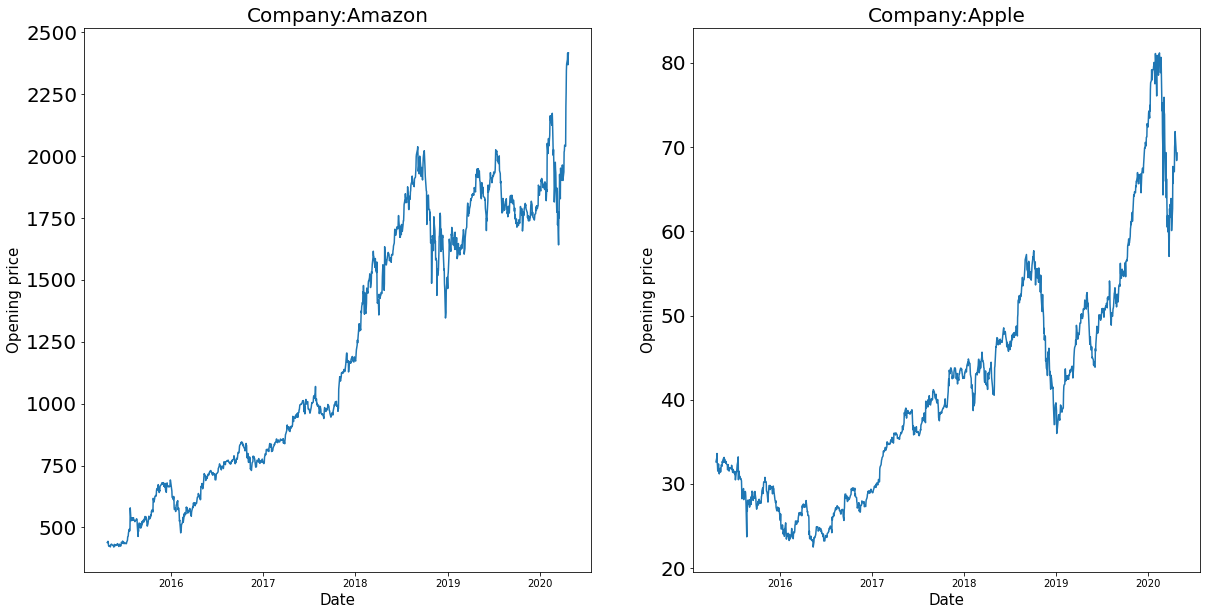

In [ ]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 

plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) 

plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

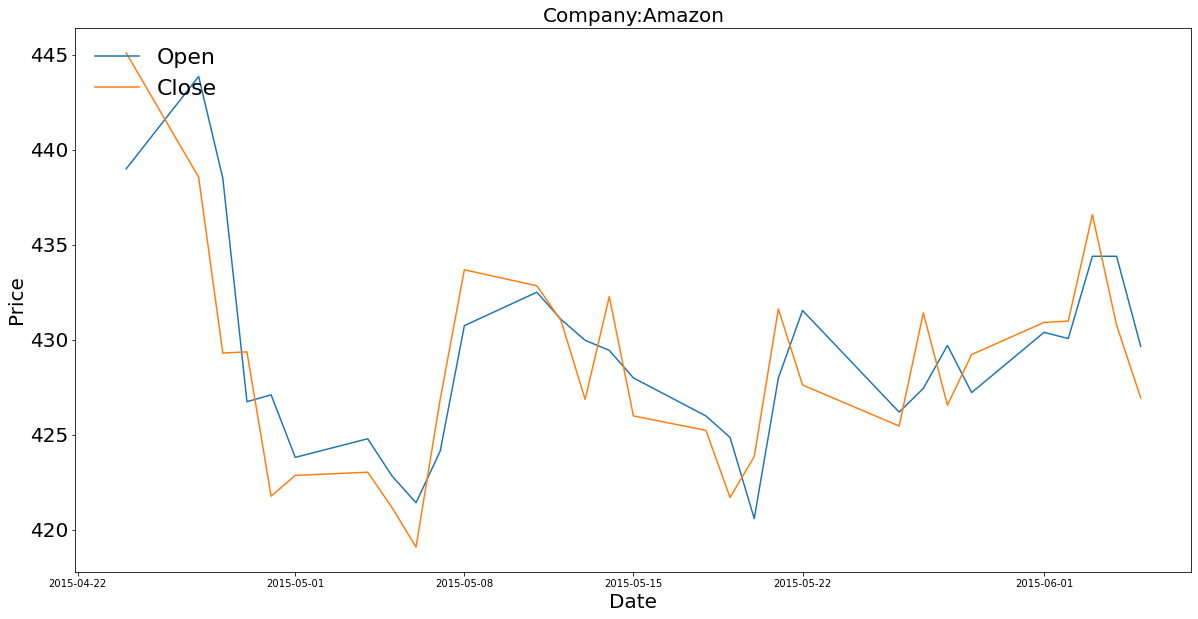

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

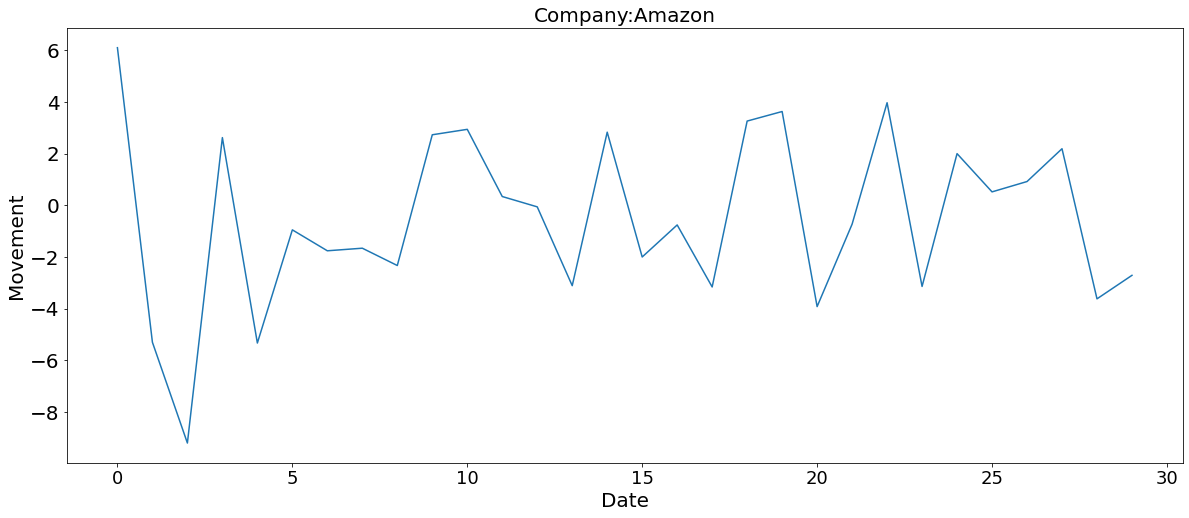

In [ ]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

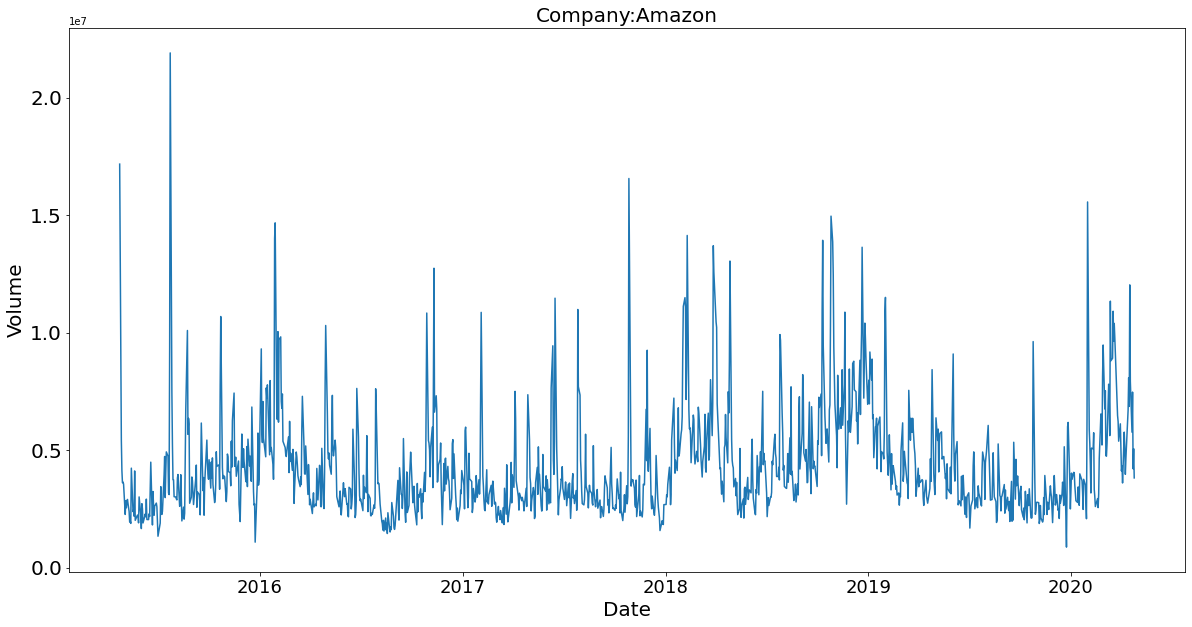

In [ ]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open')

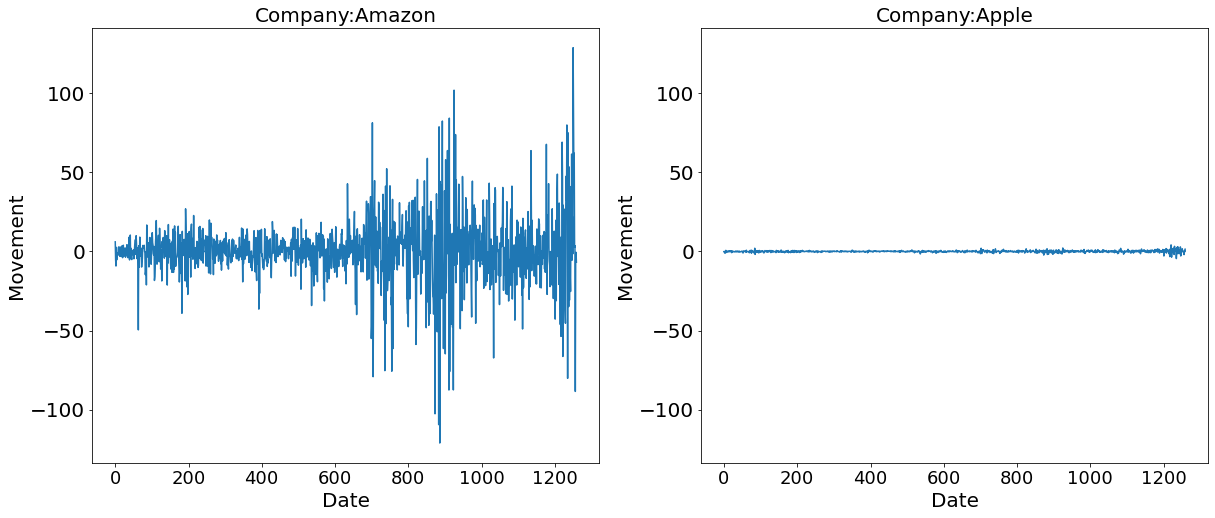

In [ ]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [ ]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.3350859880144041
0.2655260562450729
-3.7305170970841864e-05


#### CREATING A PIPELINE

In [ ]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [ ]:
predictions

array([2, 2, 4, 1, 8, 1, 9, 2, 7, 2, 2, 2, 6, 5, 3, 3, 3, 7, 7, 0, 0, 7,
       7, 5], dtype=int32)

In [ ]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)

In [ ]:
df1

,labels,companies
16,0,Johnson & Johnson
15,0,Coca Cola
14,0,Pepsi
23,1,Bank of America
18,1,Honda
17,1,Toyota
22,1,Ford
8,1,IBM
13,2,American Express
10,2,MasterCard


### Dimension Reduction-Principal Component Analysis(PCA)

In [ ]:

from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)

### Plot the Decision Boundary

<Figure size 432x288 with 0 Axes>

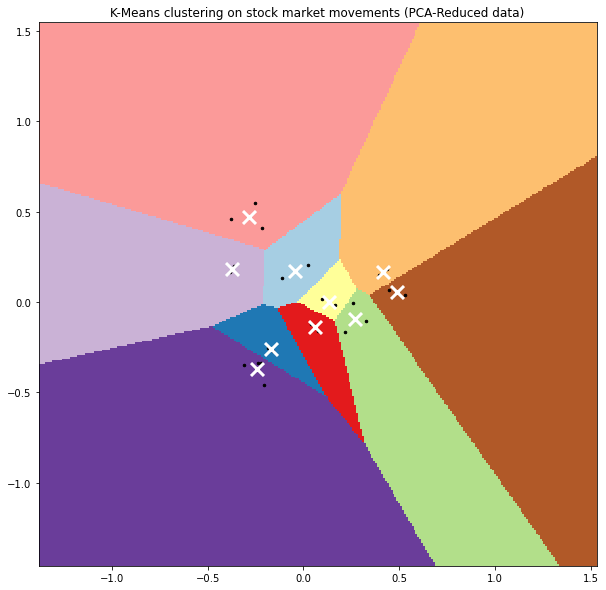

In [ ]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()